In [14]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [15]:
df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\student-por.csv",sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [16]:
data = df[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,0,11,11,2,0,4
1,9,11,11,2,0,2
2,12,13,12,2,0,6
3,14,14,14,3,0,0
4,11,13,13,2,0,0


In [17]:
#predict "G3"
predict = "G3"

X = np.array(data.drop([predict], 1)) # Features
y = np.array(data[predict])

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.1)

linear = linear_model.LinearRegression()

linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test)
print(acc)

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_32\1708232014.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop([predict], 1)) # Features


0.8090838407532246
Coefficient: 
 [ 0.1120573   0.90753104  0.0730636  -0.26185901  0.02337028]
Intercept: 
 -0.029128622338188137
12.28674194555516 [11 12  2  0  2] 14
17.113828481258672 [14 17  2  0  0] 17
11.379210904456606 [11 11  2  0  2] 12
13.657995932935105 [13 13  4  0  6] 13
15.491634177038208 [14 15  4  0  2] 17
8.758746350282857 [7 9 3 2 6] 10
12.622913844664447 [14 12  2  0  2] 13
7.602610801754569 [5 8 1 1 0] 0
8.830106490450715 [10  9  2  3  9] 10
11.989563741609922 [ 9 12  1  0  2] 13
7.5120906588837935 [4 8 2 2 9] 8
10.135507964248767 [ 8 10  2  0  2] 10
8.84631374196241 [8 9 1 1 0] 10
12.492280383055355 [12 12  2  0  6] 13
13.186526112919212 [12 13  1  0  0] 12
16.45378232401558 [16 16  2  0  1] 16
18.542652325708655 [18 18  3  0  0] 18
10.692712048327255 [10 10  4  0 10] 10
13.538191759497506 [13 13  3  0  4] 13
9.319624933330358 [ 8  9  3  1 14] 8
12.33348251445371 [11 12  2  0  4] 12
12.166937772117562 [11 12  1  0  0] 11
9.677106679552905 [ 9 10  2  2  0] 11
12.39

In [18]:
#Save Model
with open("studentgrades.pickle", "wb") as f:
    pickle.dump(linear, f)

In [19]:
#load model
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

In [36]:
print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")
print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

-------------------------
Coefficient: 
 [-0.02822894 -0.02391581 -0.06633678]
Intercept: 
 0.5489498902987208
-------------------------
-------------------------
Coefficient: 
 [-0.02822894 -0.02391581 -0.06633678]
Intercept: 
 0.5489498902987208
-------------------------


In [38]:
predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])


0.49386247824315227 [0.59805527 0.60465198 0.88302982] 0.22500981418542443
0.6378907992630907 [0.0922669  0.15374693 0.50664818] 0.006117558653601085
0.5144895439077508 [0.83055732 0.19150861 0.65941845] 0.9480935842302074
0.5173920759194548 [0.3173155  0.57706409 0.28097312] 0.8224427093988882
0.5351182292276588 [0.16755179 0.55556107 0.04506419] 0.4167146158024191
0.41299332275087597 [0.56201554 0.94858079 0.28001448] 0.12433757304723081
0.5930650609331762 [0.40422343 0.07986886 0.402257  ] 0.37391887835550586
0.4567636373499043 [0.9259482  0.44894438 0.70414732] 0.2671381663086062
0.49460009199770694 [0.6471133  0.43112584 0.44760596] 0.16060764104090397
0.5934790467559816 [0.23997749 0.13291612 0.01644504] 0.6989571503402816


In [40]:
#SAVE AND TRAIN MULTIPLE MODELS 

best = 0
for _ in range(20):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))
    
    # If the current model has a better score than one we've already trained then save it
    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

Accuracy: -0.2414641582258159
Accuracy: -0.09729967309828935
Accuracy: -0.0618858557772759
Accuracy: -0.038189929905450004
Accuracy: -0.04264945865617453
Accuracy: -0.4190695579527526
Accuracy: -0.35431251511954787
Accuracy: -0.24018694253205042
Accuracy: -0.3219208634007986
Accuracy: -0.5344413427593364
Accuracy: -0.293464247536245
Accuracy: -0.7891795751307784
Accuracy: -1.385638916938058
Accuracy: -0.20983619292997746
Accuracy: -0.2235821745773241
Accuracy: -0.019182272171309078
Accuracy: -0.013254431995019411
Accuracy: -0.13775073466654297
Accuracy: -2.8396998694324
Accuracy: 0.054403015354854034


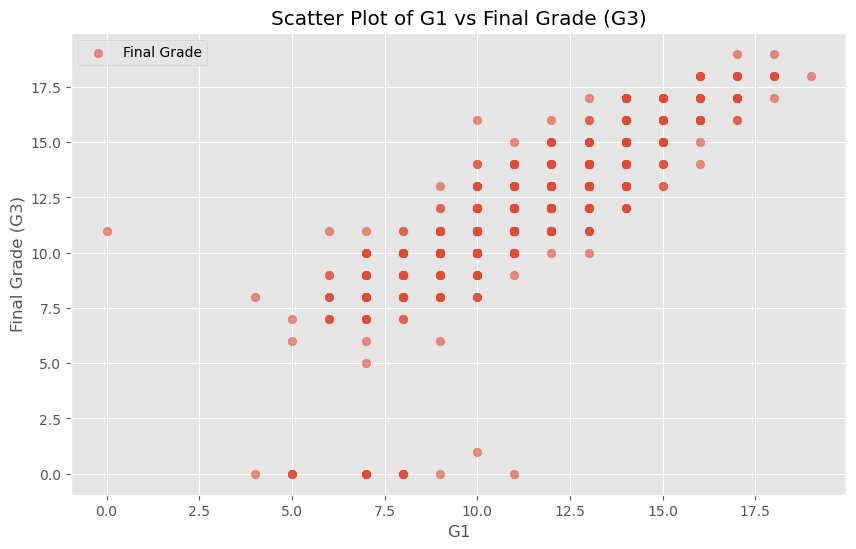

In [42]:
# Drawing and plotting model
plot = "G1"  
style.use("ggplot")
# Check if the specified column exists in the DataFrame
if plot in data.columns and "G3" in data.columns:
    plt.figure(figsize=(10, 6))  # Optional: set figure size
    plt.scatter(data[plot], data["G3"], alpha=0.6)  # Optional: alpha for transparency
    plt.xlabel(plot)
    plt.ylabel("Final Grade (G3)")
    plt.title(f'Scatter Plot of {plot} vs Final Grade (G3)')  # Add title
    plt.legend(["Final Grade"])  # Specify legend label
    plt.grid(True)  # Optional: add grid for better readability
    plt.show()
else:
    print(f"One of the columns '{plot}' or 'G3' does not exist in the DataFrame.")